In [ ]:
using Plots, MAT, DSP, WAV, LinearAlgebra, FFTW, StatsBase

In [2]:
sig_m = matopen("sinal.mat")
sig_m = read(sig_m)
Ta = sig_m["Ta"]
fa = 1/Ta
sig = sig_m["x"]

println(Ta)
println(fa)

6.25e-5
16000.0


In [3]:
wavplay(sig[1:end], fa)
#println(maximum(sig))

In [4]:
bpm_max = 80
bps_max = 80/60
note_dur = 1/bps_max
M_max = Int(fa * note_dur) # If M is higher, the window always extends into neighboring notes

M_min = Int(fa ÷ 11.7076) * 4

M = M_min
N = M

5464

In [5]:
resolution = fa / M
freq_max = 400
k_max = Int(freq_max ÷ resolution) + 1
k_max * resolution

401.17130307467056

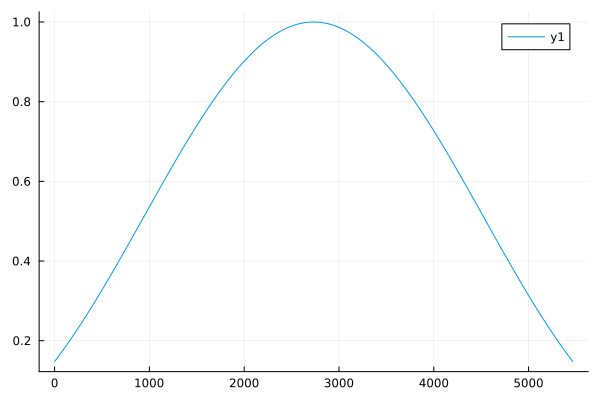

In [6]:
δₚ = 0.01
δᵣ = 0.001
A = maximum([-20*log10(δₚ), 20*log10(δᵣ)])
β = 0.5842*(A-21)^0.4 + 0.07886*(A-21)

w = kaiser(M+1, β/π, padding=N-M)
#ω = range(0, stop=π, length=1000)
#plot(ω/π, (abs.(freqresp(PolynomialRatio(w, [1]), ω))))
plot(w)

In [7]:
R = M_min ÷ 2
sftc = zeros(Float64, (length(sig)-length(w))÷R, k_max)
for i in 1:(length(sig)-length(w))÷R
    sftc[i,:] = abs.(fft(sig[i*R:i*R+length(w)-1])[1:k_max])
end
println(length(sftc[:, 1]))
println(length(sftc[1, :]))
#println(maximum(sftc_abs))

UndefVarError: UndefVarError: `fft` not defined

In [114]:
collect(range(start=0, step=resolution, length=k_max))
collect(1:size(sftc, 2))


137-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
 129
 130
 131
 132
 133
 134
 135
 136
 137

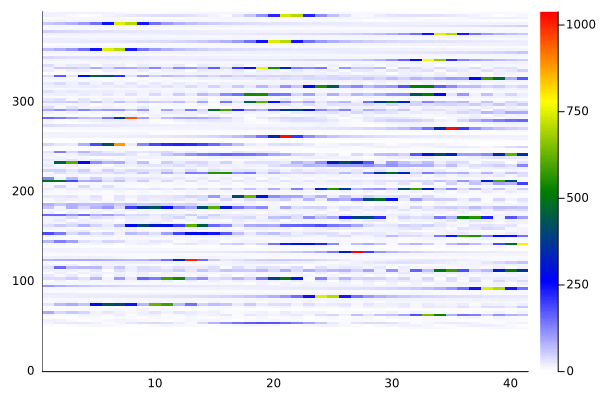

In [115]:
spectrogram = heatmap(1:size(sftc, 1), range(start=0, step=resolution, length=k_max), sftc, c=cgrad([:white, :blue, :green, :yellow, :red]))
#savefig(spectrogram, "spectrogram.png")